<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset



## 1. Import Libraries/Dataset

In [1]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

## 1.1 Load Dataset

In [2]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 1.2 GPU Availability

In [3]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [6]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

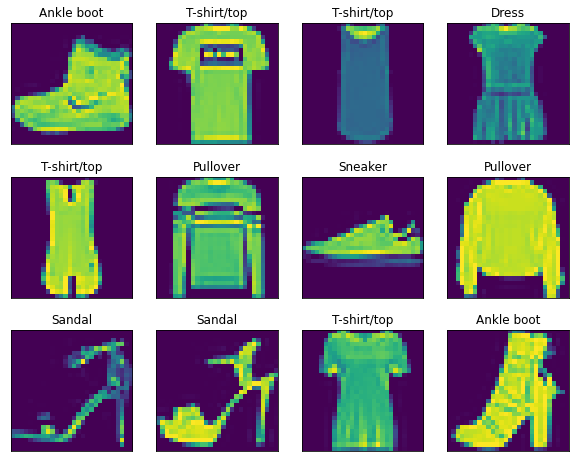

In [7]:
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i])
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Process the image data



In [8]:
# Convert target labels to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)


### 3.2 Split the data into Train, Holdout and Dev(test)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [10]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [11]:
def build_model():
  # L2 regularizer rate
  l2_rate = 0.003 # 0.001 
  dropout_rate = 0.3 # Dropout rate

  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model


In [12]:
# Building a model
ffnn_model = build_model()

In [13]:
ffnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Categorical Cross Entropy
2. Optimizer - ADAM with learning rate 0.0005
3. Metrics - Accuracy

In [14]:
ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=0.00023),
                  metrics=['accuracy'])

## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [15]:
epochs_run = 30
batchsize = 128

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)
# Total time taken for training the given dataset
elapsed = time.perf_counter() - start_time


Epoch 1/30
375/375 [==============================] - 1s 4ms/step - loss: 14.8678 - accuracy: 0.3775 - val_loss: 3.2684 - val_accuracy: 0.5688
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 3.7642 - accuracy: 0.4488 - val_loss: 3.0485 - val_accuracy: 0.6004
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 3.2952 - accuracy: 0.5210 - val_loss: 2.8335 - val_accuracy: 0.6298
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 3.0689 - accuracy: 0.5540 - val_loss: 2.6805 - val_accuracy: 0.6508
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 2.9074 - accuracy: 0.5761 - val_loss: 2.6019 - val_accuracy: 0.6631
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 2.7691 - accuracy: 0.5943 - val_loss: 2.4585 - val_accuracy: 0.6931
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 2.6386 - accuracy: 0.6204 - val_loss: 2.3521 - val_accuracy: 0.7000
Epoch

### Scoring with test data

In [30]:
val_loss, val_acc = ffnn_model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.5841 - accuracy: 0.8420


Validation Loss 0.584 and Validation Accuracy 0.84%


### 6.2 Plot loss and accuracy history graphs.

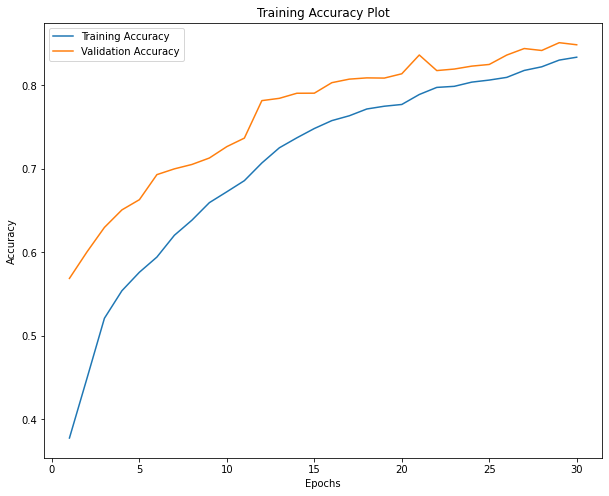

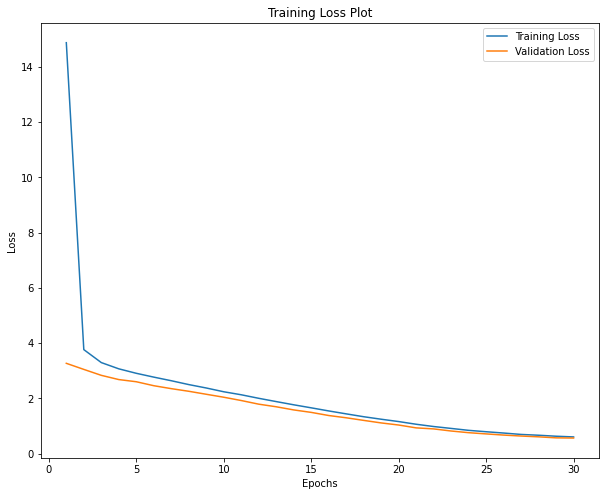

In [31]:
def evaluation_plot(history):
  """
  Method plots the model training result
  :param history: history of the model epochs run
  """
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  # Loss details
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label="Training Accuracy")
  plt.plot(epochs, val_acc, label="Validation Accuracy")
  plt.title("Training Accuracy Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  # Loss and Validation loss plot
  plt.figure(figsize=(10,8))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.title("Training Loss Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the epochs run
evaluation_plot(history)

### Total time taken for training

In [32]:
print("=="*40)
print("Total time taken for training {:.2f} seconds".format(elapsed))
print("=="*40)

Total time taken for training 38.72 seconds


## 7. Model Evaluation

### a. Score with Test data


In [33]:
y_preds = ffnn_model.predict(X_test)

In [34]:
# Converting Logits to Class code using argmax()
y_hat = tf.argmax(y_preds, 1)
rounded_test_labels = tf.argmax(y_test, 1)

In [35]:
y_hat.numpy()

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
print("Confusion Matrix: \n {}".format(classification_report(rounded_test_labels, y_hat.numpy())))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.72      0.75      0.73      1000
           3       0.86      0.87      0.86      1000
           4       0.63      0.82      0.71      1000
           5       0.94      0.96      0.95      1000
           6       0.66      0.41      0.51      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Hyperparameter Tuning

## 1. Model without regularization

In [37]:
def model_without_regularization():
  """
  Model without regularization 
  :return : Model with 3 hidden layers

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

In [38]:
# model object
model = model_without_regularization()

# Print model summary
print(model.summary())

# Compile the model
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 259,274
Trainable params: 259,274
Non-trainable params: 0
________________________________________________

In [39]:
# Fitting the data
m_history = model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 2.0055 - accuracy: 0.7471 - val_loss: 0.5940 - val_accuracy: 0.8101
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5380 - accuracy: 0.8246 - val_loss: 0.5349 - val_accuracy: 0.8240
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8487 - val_loss: 0.4495 - val_accuracy: 0.8438
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8555 - val_loss: 0.4581 - val_accuracy: 0.8478
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3773 - accuracy: 0.8630 - val_loss: 0.4123 - val_accuracy: 0.8583
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8720 - val_loss: 0.5033 - val_accuracy: 0.8235
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8771 - val_loss: 0.4081 - val_accuracy: 0.8594
Epoch 

### Evaluate model with test data

In [40]:
val_loss, val_acc = model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4059 - accuracy: 0.8723


Validation Loss 0.406 and Validation Accuracy 0.87%


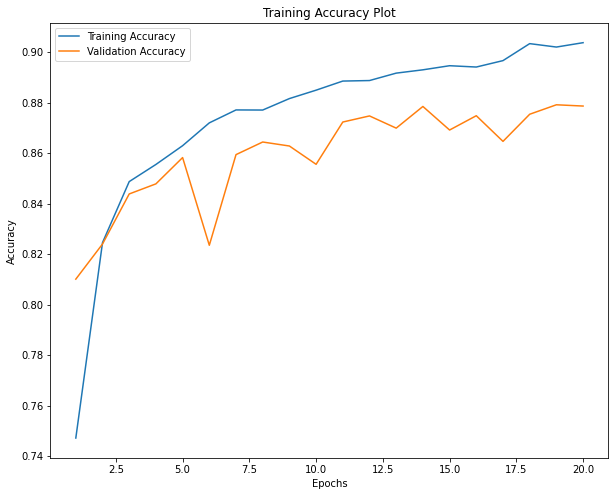

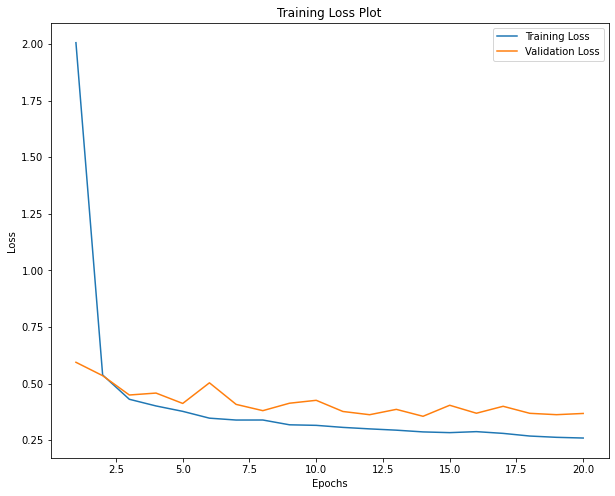

In [41]:
evaluation_plot(m_history)

## 2. Model with dropouts at different layers

In [42]:
def model_with_dropouts():
  """
  Model with only dropouts as to avoid overfitting
  :return : Constructed model

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dropout(0.2)) # Dropout at hidden layer 1
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.4)) # Dropout at hidden layer 3
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))  # Dropout at hidden layer 4
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

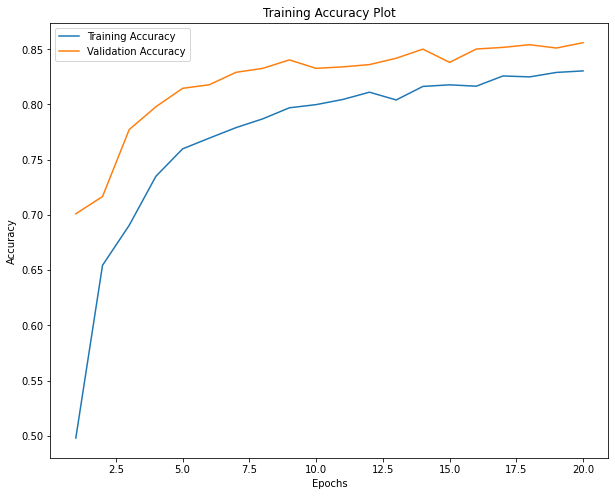

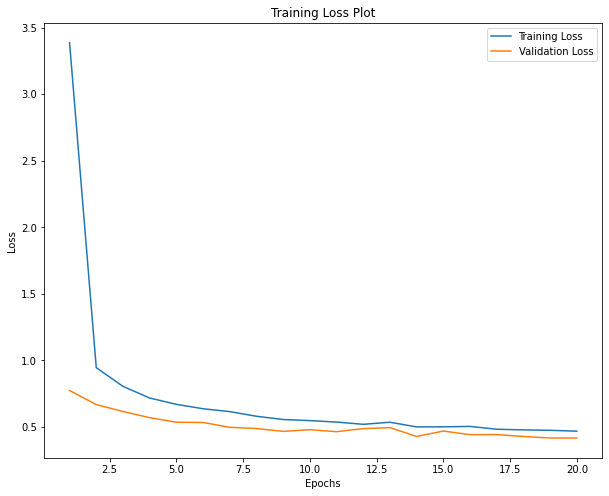

In [43]:
# model object
model = model_with_dropouts()

# Print model summary
print(model.summary())

# Compile the model
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

# Fitting the data
d_history = model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)



### Evaluate model with test data

313/313 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.8511


Validation Loss 0.439 and Validation Accuracy 0.85%


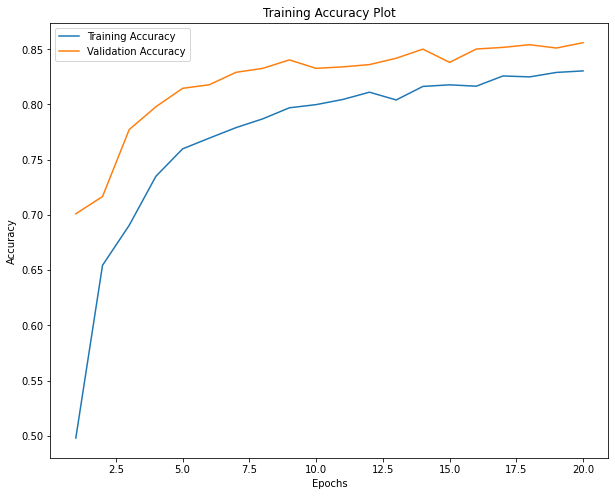

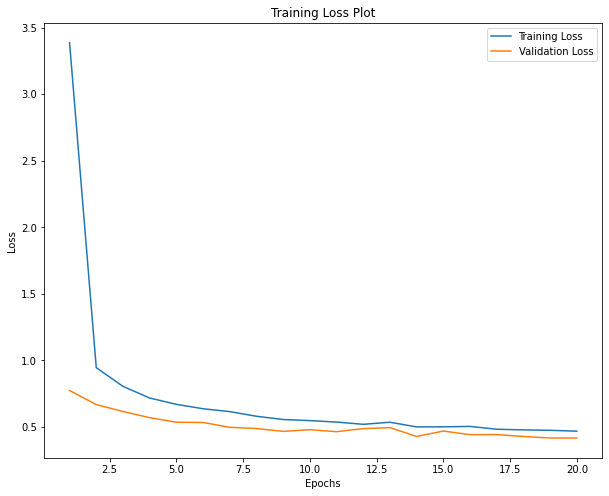

In [45]:
val_loss, val_acc = model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

evaluation_plot(d_history)

## Conclusion

The `MNIST-Fashion` dataset had a volume of **70,000 images** of various fashion materials like apparals, shoes, and accessaries. The primary objective of the model was to learn the image pixel data to classify the image into one of the 10 categorical labels.

The summary of the preprocessing, model building and evaluation is described below,

* The image data was in the shape of 28 x 28 size. 
* The training set **60,000 images** were split into **80:20** ratio for train and validation/holdout dataset, which is effectively **48,000 train** and **12,000 images** for validation. 
* The **10,000 image** data were kept as a test/dev set. 
* There were 10 unique class labels to be predicted based on the image data. 
* A deep network model was build with `L2 regularization` and `Dropout` layers at every hidden layer.
* A set of parameters used during model compilation were like,
  * Optimizer = 'Adam'
  * Loss = 'Categorical Cross Entropy'
  * Metrics = 'Accuracy'

In [29]:
T